<h1>영상 변환</h1>

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/swkim01/DSAC5/blob/main/gg-09-영상_변환.ipynb"><img src="https://github.com/swkim01/DSAC5/raw/main/colab_logo_32px.png" />구글 코랩에서 실행</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/swkim01/DSAC5/blob/main/gg-09-영상_변환.ipynb"><img src="https://github.com/swkim01/DSAC5/raw/main/GitHub-Mark-32px.png" />깃헙에서 소스 보기</a>
  </td>
</table>

시작전에 sdk.png를 코랩 환경의 '/content/sample_data'에 업로드해준다.

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   131  100   131    0     0   3275      0 --:--:-- --:--:-- --:--:--  3275
100 70654  100 70654    0     0   704k      0 --:--:-- --:--:-- --:--:--  704k
[[ 1.69655055e+02 -3.33435501e+01  4.24080802e+00 ...  2.33926625e-03
  -3.35996460e-03  2.79848334e-03]
 [ 2.12056969e+01  7.73900857e+00  4.68134919e+00 ... -3.93962614e-04
  -1.25150894e-03  1.07909342e-03]
 [-8.36727818e+00 -7.02438054e-02  9.36727133e+00 ...  3.68071282e-03
  -3.26697708e-03 -1.43233486e-04]
 ...
 [ 8.39234520e-03  9.35569343e-04 -5.98809353e-03 ... -6.47962083e-04
  -1.05333548e-04 -1.86918784e-04]
 [-2.05166368e-03  1.52108955e-03 -5.30882362e-03 ... -1.38582369e-04
  -5.83314292e-04 -1.08107560e-04]
 [-1.71843762e-03 -1.64862309e-03  2.43583794e-03 ...  2.04250066e-05
  -5.93401743e-04 -2.38573863e-04]]


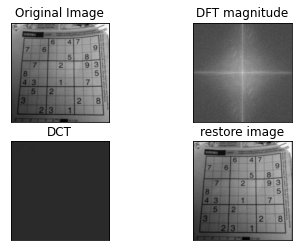

In [32]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
# 이미지 읽기
!curl -L https://github.com/swkim01/DSAC5/raw/main/data/sdk.png -o sdk.png
img = cv.imread('./sdk.png',0)
#img = cv.imread('/content/sample_data/sdk.png',0)
img = img / 255

# DFT
fft = cv.dft(img, flags=cv.DFT_COMPLEX_OUTPUT)

# spectrum visualization
shifted = np.fft.fftshift(fft, axes=[0,1])
magnitude = cv.magnitude(shifted[:,:,0], shifted[:,:,1])
magnitude = np.log(magnitude)

# DCT
#print(img.shape)
h, w = img.shape
if h % 2 == 1: h += 1
if w % 2 == 1: w += 1
dct = cv.dct(cv.resize(img, (width, height)))
print(dct)

# restore
restore = cv.idft(fft, flags=cv.DFT_SCALE | cv.DFT_REAL_OUTPUT)

titles = ['Original Image', 'DFT magnitude', 'DCT', 'restore image']
images = [img, magnitude, dct, restore]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()